In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, scale, OneHotEncoder
from sklearn.feature_selection import RFECV, SelectKBest, SelectPercentile, SelectFpr, f_regression,\
mutual_info_regression, SelectFromModel
from sklearn.pipeline import make_pipeline
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

# Outline
## Task 1: Linear Models
### Using following models:
1. Linear Regression
2. Ridge
3. Lasso
4. Elastic Net

Ridge with standard scaler is the best linear model, which get the highest test-set score ($R^2$). So we will use this model in task 2 and 4 for feature engineering and feature selection.

### Preprocessing:
1. Used numeric-value columns
2. Deleted columns with null values more than 90% of the corresponding column data
3. Imputed missing values with mean
4. Replace "Yes" and "No" categorical feature values with "1" and "0", respectively
5. Delected highly correlated features


## Task 2: Feature Engineering
1. Polynomial feature

## Task 3: Any models
1. SVM
2. Decision tree
3. Gradient Boosting

## Task 4: Feature Selection
1. SelectKBest
2. Model-Based Feature Selection
3. RFECV

# Task 1: Linear Models

## Preprocessing

In [3]:
filepath1 = "2015 FE Guide-for DOE-Mobility Ventures only-OK to release-no-sales-4-27-2017Mercedesforpublic.xlsx"
filepath2 = "2016 FE Guide for DOE-OK to release-no-sales-4-27-2017Mercedesforpublic.xlsx"
filepath3 = "2017 FE Guide for DOE-release dates before 9-20-2017-no sales-9-19-2017MercedesCadillacforpublic.xlsx"
filepath4 = "2018 FE Guide for DOE-release dates before 2-17-2018-no-sales-2-15-2018public.xlsx"
df1 = pd.read_excel(filepath1)
df2 = pd.read_excel(filepath2)
df3 = pd.read_excel(filepath3)
df4 = pd.read_excel(filepath4)

In [4]:
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

In [5]:
def get_percentage_missing(series):
    """ Calculates percentage of NaN values in DataFrame
    :param series: Pandas DataFrame object
    :return: float
    """
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 2)

In [6]:
def preprocess(df):
    
    df_with_any_null_values = df[df.columns[df.isnull().any()].tolist()]
    percentage = get_percentage_missing(df_with_any_null_values)
    for name, values in df_with_any_null_values.iteritems():
        if get_percentage_missing(df_with_any_null_values[name]) >= 0.9 :
            df.drop(name, axis=1, inplace=True)
    sub = ['EPA','CO2','Smog','Guzzler','FE','MPG','GHG','Cost','Rating','Range']
    for s in sub:
        for i in list(df):
            if i.find(s) != -1:
                del df[i]
    del df['Release Date']
    del df['Model Year']
    #replace yes and no with 1 and 0
    df = df.replace('Y',1)
    df = df.replace('N',0)
    df = df.replace('Yes',1)
    df=  df.replace('No',0)
    for y in df.columns:
        if (is_numeric_dtype(df[y])):
            df[y] = df[y].fillna(value=np.mean(df[y]))
            if np.sum(df[y]) == 0:
                del df[y]
        else:
            del df[y] #del non numerical data
    return df

In [7]:
data = pd.concat([df1, df2, df3], axis=0, join = 'inner')
data = df1.append([df2,df3],ignore_index=True)
X_train = data.drop('Comb Unrd Adj FE - Conventional Fuel', axis = 1)
y_train = data['Comb Unrd Adj FE - Conventional Fuel']
X_test = df4.drop('Comb Unrd Adj FE - Conventional Fuel', axis = 1)
y_test = df4['Comb Unrd Adj FE - Conventional Fuel']
X_train.shape

(3701, 161)

In [8]:
X_train = preprocess(X_train)
#X_train = pd.get_dummies(X_train)
print(X_train.shape)

(3701, 23)


In [9]:
X_test = preprocess(X_test)
#X_test= pd.get_dummies(X_test)
print(X_test.shape)

(1220, 23)


In [10]:
def intersect(a, b):
     return list(set(a) & set(b))

In [11]:
def common_features(df,lst):
    for i in df:
        if not(i in lst):
            del df[i]
    return df

In [12]:
b1 = list(X_train)
b2 = list(X_test)
common = intersect(b1, b2)
X_train = common_features(X_train,common)
X_test= common_features(X_test,common)
print(len(common))

23


## Linear models and Visualization

### Model 1: Linear Regression

In [13]:
print("Linear Regression score: {:.6f}".format(
    np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv =10))))

Linear Regression score: 0.723553


#### With Standard Scaler

In [14]:
def sscaler(X):
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    return X_scaled

In [15]:
#scaler = StandardScaler()
#scaler.fit(X_train)
X_train_scaled = sscaler(X_train)

In [16]:
LR = LinearRegression().fit(X_train_scaled, y_train)
print("Linear Regression cv score: {:.6f}".format(
    np.mean(cross_val_score(LR, X_train_scaled, y_train, cv =10))))

Linear Regression cv score: 0.723553


In [17]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [18]:
print("Linear Regression cv test score: {:.6f}".format(
    LR.score(X_test_scaled,y_test)))

Linear Regression cv test score: 0.717659


### Model 2: Ridge

In [19]:
print("Ridge score: {:.6f}".format(
    np.mean(cross_val_score(Ridge(), X_train, y_train))))

Ridge score: 0.761463


In [20]:
rg_param= {'alpha': np.logspace(-3, 3, 13)}
rg_grid = GridSearchCV(Ridge(), rg_param)
rg_grid.fit(X_train,y_train)
print("Ridge best parameter: {}".format(rg_grid.best_params_['alpha']))
print("Ridge best score: {:.6f}".format(rg_grid.best_score_))

Ridge best parameter: 10.0
Ridge best score: 0.762176


#### With Standard Scaler 

In [21]:
RG = Ridge().fit(X_train_scaled, y_train)
print("Ridge cv score: {:.6f}".format(
    np.mean(cross_val_score(RG, X_train_scaled, y_train))))

Ridge cv score: 0.760889


In [22]:
rg_pipe = make_pipeline(StandardScaler(), Ridge())
rg_param = {'ridge__alpha': np.logspace(0, 3, 13)}
rg_grid1 = GridSearchCV(rg_pipe, rg_param, cv = 10).fit(X_train, y_train)
print("After StandardScaler:")
print("Ridge best parameter: {}".format(rg_grid1.best_params_))
print("Ridge grid search score: {:.6f}".format(rg_grid1.score(X_train, y_train)))

After StandardScaler:
Ridge best parameter: {'ridge__alpha': 31.622776601683793}
Ridge grid search score: 0.778264


In [23]:
print("Ridge cv test score: {:.6f}".format(RG.score(X_test_scaled, y_test))) 

Ridge cv test score: 0.717669


In [24]:
RG1 = Ridge(alpha = rg_grid1.best_params_['ridge__alpha']).fit(X_train_scaled, y_train)

In [25]:
print("Ridge gridsearch test score: {:.6f}".format(RG1.score(X_test_scaled, y_test))) 

Ridge gridsearch test score: 0.717860


In [26]:
y_pred_rg = RG1.predict(X_test_scaled)

In [27]:
print("R^2 score: {:.6f}".format(r2_score(y_test,y_pred_rg)))

R^2 score: 0.717860


#### Visualization

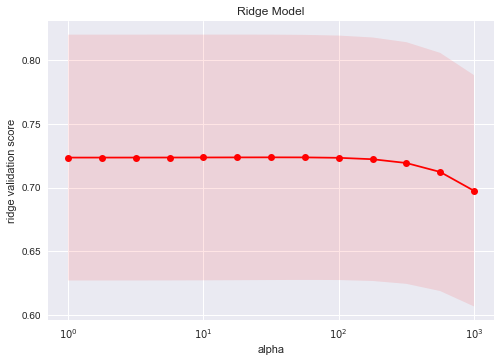

In [28]:
alpha = rg_param['ridge__alpha']
rg_score = rg_grid1.cv_results_['mean_test_score'].reshape((1,len(alpha)))
for ind, i in enumerate(rg_score):
    plt.xscale('log')
    plt.plot(alpha, rg_score[ind],"o-",color='r')
    plt.xlabel('alpha')
    plt.ylabel('ridge validation score') 
    plt.title("Ridge Model")
    plt.fill_between(alpha,rg_grid1.cv_results_['mean_test_score']
                     +rg_grid1.cv_results_['std_test_score'],
                     rg_grid1.cv_results_['mean_test_score']-
                     rg_grid1.cv_results_['std_test_score'], 
                     facecolor = 'r', alpha=0.1)
plt.show()

### Model 3: Lasso

In [29]:
print("Lasso cv score: {:.6f}".format(
    np.mean(cross_val_score(Lasso(tol = 0.1),X_train,y_train))))

Lasso cv score: 0.709861


In [30]:
la_param = {'alpha': np.logspace(-3, 0, 13)}
la_grid = GridSearchCV(Lasso(tol=0.1), la_param)
la_grid.fit(X_train, y_train)
print("Lasso best parameter : {}".format(la_grid.best_params_['alpha']))
print("Lasso grid search best score: {:.6f}".format(la_grid.best_score_))

Lasso best parameter : 0.0017782794100389228
Lasso grid search best score: 0.762019


#### With Standard Scaler

In [31]:
LA = Lasso(tol = 0.1).fit(X_train_scaled, y_train)
print("Lasso cv score: {:.6f}".format(
    np.mean(cross_val_score(LA, X_train_scaled, y_train))))

Lasso cv score: 0.628991


In [32]:
la_pipe = make_pipeline(StandardScaler(), Lasso(tol=0.1))
la_param1 = {'lasso__alpha': np.logspace(-3, 0, 13)}
la_grid1 = GridSearchCV(la_pipe, la_param1, cv = 10).fit(X_train, y_train)
print("Lasso best parameter: {}".format(la_grid1.best_params_))
print("Lasso grid search score: {:.6f}".format(la_grid1.score(X_train, y_train)))

Lasso best parameter: {'lasso__alpha': 0.001}
Lasso grid search score: 0.778077


In [33]:
LA1 = Lasso(alpha = la_grid1.best_params_['lasso__alpha']).fit(X_train_scaled, y_train)

In [35]:
#test score
print("Lasso grid search test score: {:.6f}".format(LA1.score(X_test_scaled, y_test)))

Lasso grid search test score: 0.717820


In [50]:
#la_pipe.get_params().keys()
#la_grid1.cv_results_

#### Visualization

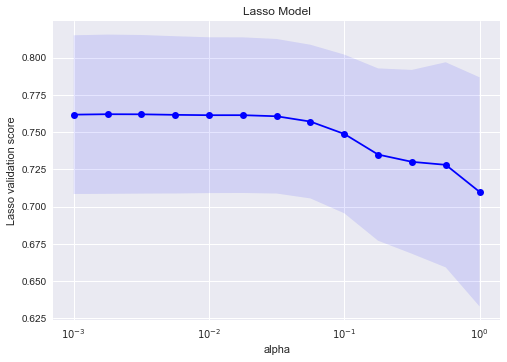

In [36]:
alpha = la_param['alpha']
la_score = la_grid.cv_results_['mean_test_score'].reshape((1,len(alpha)))
for ind, i in enumerate(la_score):
    plt.xscale('log')
    plt.plot(alpha, la_score[ind], 'o-', color='b')
    plt.xlabel('alpha')
    plt.ylabel('Lasso validation score')
    plt.title("Lasso Model")
    plt.fill_between(alpha,la_grid.cv_results_['mean_test_score']+
                     la_grid.cv_results_['std_test_score'],
                     la_grid.cv_results_['mean_test_score']-
                     la_grid.cv_results_['std_test_score'], 
                     facecolor = 'b', alpha=0.1)
plt.show()

### Model 4: Elastic Net

In [37]:
print("ElasticNet cv score: {:.6f}".format(
    np.mean(cross_val_score(ElasticNet(tol = 0.1),X_train,y_train))))

ElasticNet cv score: 0.710193


In [38]:
el_param = {'alpha': np.logspace(-4, -1, 10),
          'l1_ratio': [0.01, .1, .5, .9, .98, 1]}
el_grid = GridSearchCV(ElasticNet(tol=0.2), el_param)
el_grid.fit(X_train, y_train)
print("ElasticNet best parameter: {:}".format(el_grid.best_params_))
print("ElasticNet grid search best score: {:.6f}".format(el_grid.best_score_))

ElasticNet best parameter: {'alpha': 0.021544346900318822, 'l1_ratio': 0.01}
ElasticNet grid search best score: 0.760376


#### With Standard Scaler

In [39]:
EL = ElasticNet(tol = 0.2).fit(X_train_scaled, y_train)
print("Elastic Net cv score: {:.6f}".format(
    np.mean(cross_val_score(EL, X_train_scaled, y_train))))

Elastic Net cv score: 0.649790


In [40]:
el_pipe = make_pipeline(StandardScaler(), ElasticNet(tol=0.2))
el_param1 = {'elasticnet__alpha': np.logspace(-4, -1, 10),
          'elasticnet__l1_ratio': [0.01, .1, .5, .9, .98, 1]}
el_grid1 = GridSearchCV(el_pipe, el_param1).fit(X_train, y_train)
print("Elastic Net best parameter: {}".format(el_grid1.best_params_))
print("Elastic Net grid search score: {:.6f}".format(el_grid1.score(X_train, y_train)))

Elastic Net best parameter: {'elasticnet__alpha': 0.10000000000000001, 'elasticnet__l1_ratio': 0.5}
Elastic Net grid search score: 0.773540


In [41]:
EL1 = ElasticNet(alpha = el_grid1.best_params_['elasticnet__alpha'], l1_ratio = el_grid1.best_params_['elasticnet__l1_ratio']).fit(X_train_scaled, y_train)

In [42]:
print("Elastic Net test score: {:.6f}".format(EL1.score(X_test_scaled, y_test)))

Elastic Net test score: 0.717741


#### Visualization

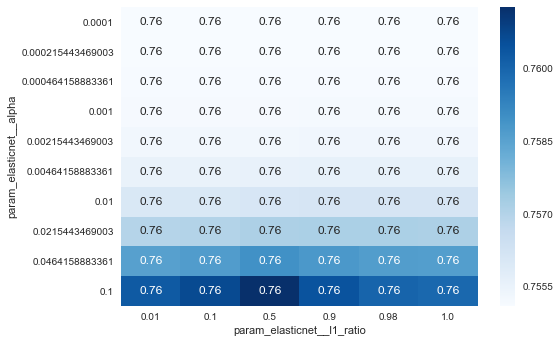

In [43]:
res = pd.pivot_table(pd.DataFrame(el_grid1.cv_results_),
    values='mean_test_score', index='param_elasticnet__alpha', columns='param_elasticnet__l1_ratio')
ax = sns.heatmap(res,annot=True,cmap='Blues')
plt.show()

# Task 2: Feature Engineering

Best linear model is Ridge

In [44]:
rg_polypipe = make_pipeline(StandardScaler(),PolynomialFeatures(include_bias = False), Ridge())

In [49]:
rg_param1= {'ridge__alpha': np.logspace(0, 3, 13)}
rg_polygrid = GridSearchCV(rg_polypipe, rg_param1, cv = 10).fit(X_train, y_train)
print("Ridge best parameter: {}".format(rg_polygrid.best_params_))
print("Ridge grid search score: {:.6f}".format(rg_polygrid.score(X_train, y_train)))

Ridge best parameter: {'ridge__alpha': 177.82794100389228}
Ridge grid search score: 0.901613


### Visualization
The following graph shows part of the prediction for test data sets. It shows that polynomial features (green line) give us a better prediction, which is closer to the true y values (red line).

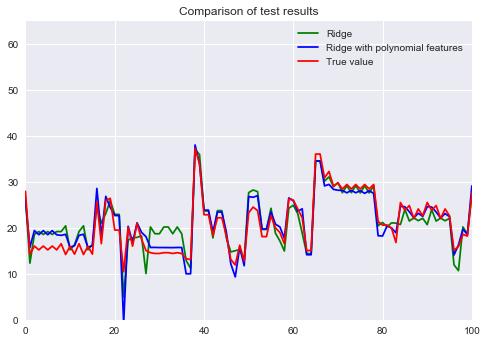

In [60]:
#Ridge using polynomial features
RG1 = Ridge(alpha = rg_grid1.best_params_['ridge__alpha']).fit(X_train_scaled, y_train)
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train_scaled)
l1 = plt.plot(RG1.predict(X_train_scaled),"g", label = "Ridge")
l2 = plt.plot(RG2.predict(X_train_poly),"b", label = "Ridge with polynomial features")
l3 = plt.plot(y_train,'r', label = "True value")
plt.title('Comparison of test results')
plt.xlim(0, 100)
plt.ylim(0,65)
plt.legend()
plt.show()

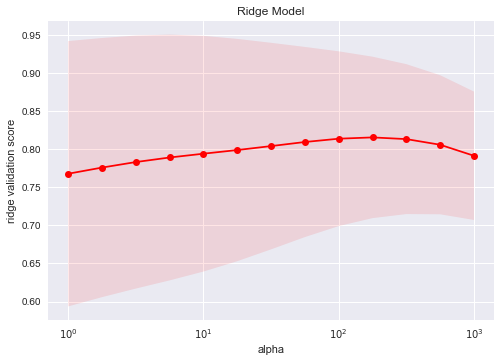

In [61]:
alpha = rg_param1['ridge__alpha']
rg_score = rg_polygrid.cv_results_['mean_test_score'].reshape((1,len(alpha)))
for ind, i in enumerate(rg_score):
    plt.xscale('log')
    plt.plot(alpha, rg_score[ind],"o-",color='r')
    plt.xlabel('alpha')
    plt.ylabel('ridge validation score') 
    plt.title("Ridge Model")
    plt.fill_between(alpha,rg_polygrid.cv_results_['mean_test_score']
                     +rg_polygrid.cv_results_['std_test_score'],
                     rg_polygrid.cv_results_['mean_test_score']-
                     rg_polygrid.cv_results_['std_test_score'], 
                     facecolor = 'r', alpha=0.1)
plt.show()

## Task 3: Any models

### Model 1: SVM

In [62]:
SVM_pipe = make_pipeline(StandardScaler(), SVR())
SVM_param = {"svr__C": [1e0, 1e1,1e2],
            "svr__gamma": np.logspace(-2, 2, 3),
            "svr__epsilon" : [0.01, 0.1, 0.5]}
SVM_grid = GridSearchCV(SVM_pipe, SVM_param).fit(X_train, y_train)
print("SVM best parameter: {}".format(SVM_grid.best_params_))
print("SVM grid search score: {:.6f}".format(SVM_grid.score(X_train, y_train)))

SVM best parameter: {'svr__gamma': 0.01, 'svr__C': 100.0, 'svr__epsilon': 0.01}
SVM grid search score: 0.932422


In [63]:
SVM1 = SVR(C = SVM_grid.best_params_['svr__C'],gamma = SVM_grid.best_params_['svr__gamma'], 
         epsilon = SVM_grid.best_params_['svr__epsilon']).fit(X_train_scaled, y_train)

In [64]:
print("Tree test score: {:.6f}".format(SVM1.score(X_test_scaled, y_test)))

Tree test score: 0.868045


### Visualization

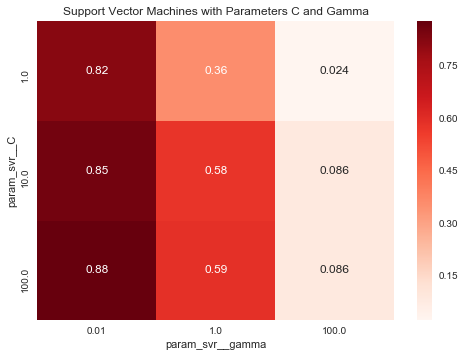

In [65]:
# visualization
svm = pd.pivot_table(pd.DataFrame(SVM_grid.cv_results_),
    values='mean_test_score', index='param_svr__C', 
                    columns='param_svr__gamma')
ax = sns.heatmap(svm,annot=True,cmap='Reds')
plt.title('Support Vector Machines with Parameters C and Gamma')
plt.show()

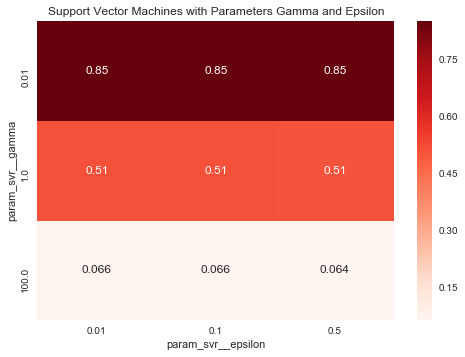

In [66]:
svm = pd.pivot_table(pd.DataFrame(SVM_grid.cv_results_),
    values='mean_test_score', index='param_svr__gamma', 
                    columns='param_svr__epsilon')
ax = sns.heatmap(svm,annot=True,cmap='Reds')
plt.title('Support Vector Machines with Parameters Gamma and Epsilon')
plt.show()

### Model 2: Decision Tree

Parameter tuning to avoid overfitting of decision tree

In [67]:
tree_pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())
tree_param = {'decisiontreeregressor__max_leaf_nodes': [40,60],
              'decisiontreeregressor__max_depth': range(5, 10) }
tree_grid = GridSearchCV(tree_pipe, tree_param).fit(X_train, y_train)
print("Tree best parameter: {}".format(tree_grid.best_params_))
print("Tree grid search score: {:.6f}".format(tree_grid.score(X_train, y_train)))

Tree best parameter: {'decisiontreeregressor__max_leaf_nodes': 60, 'decisiontreeregressor__max_depth': 6}
Tree grid search score: 0.962654


In [68]:
tree1 = DecisionTreeRegressor(max_leaf_nodes = tree_grid.best_params_['decisiontreeregressor__max_leaf_nodes'],
                              max_depth = tree_grid.best_params_['decisiontreeregressor__max_depth']).fit(X_train_scaled, y_train)

In [69]:
print("Tree test grid search score: {:.6f}".format(tree1.score(X_test_scaled, y_test)))

Tree test grid search score: 0.713959


### Model 3: Gradient Boosting

In [109]:
gb_pipe = make_pipeline(StandardScaler(),GradientBoostingRegressor(random_state=0))
gb_param = {'gradientboostingregressor__max_depth': range(5,10),
           'gradientboostingregressor__n_estimators': [100,200,300,400,500]}
gb_grid = GridSearchCV(gb_pipe, gb_param).fit(X_train, y_train)
print("Gradient Boosting score: {:.6f}".format(gb_grid.score(X_train, y_train)))

Gradient Boosting score: 0.997016


In [111]:
GB1 =  GradientBoostingRegressor(random_state=0, max_depth =  gb_grid.best_params_['gradientboostingregressor__max_depth'],
                                n_estimators =  gb_grid.best_params_['gradientboostingregressor__n_estimators']).fit(X_train_scaled, y_train)

In [112]:
print("Gradient Boosting test score: {:.6f}".format(GB1.score(X_test_scaled, y_test))) 

Gradient Boosting test score: 0.874879


### Visualization
The following graph shows that larger the n_estimator and max_depth will give us better result.
And Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

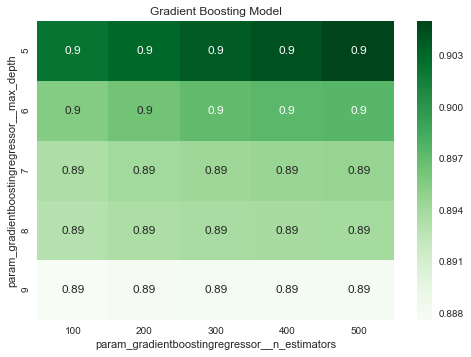

In [113]:
gb = pd.pivot_table(pd.DataFrame(gb_grid.cv_results_),
    values='mean_test_score', index='param_gradientboostingregressor__max_depth', 
                    columns='param_gradientboostingregressor__n_estimators')
ax = sns.heatmap(gb,annot=True,cmap='Greens')
plt.title('Gradient Boosting Model')
plt.show()

## Task 4: Feature Selection
### 1. SelectKBest
Select features that significantly related to the target. Based on f values and p values, we could drop 5 features.
Features with high f-value and small p-value are the important features.

### 2. Model-Based Feature Selection
Fit the linear model(Ridge), features with high coefficient(absolute value) are the important features.
The test score improved for Ridge model without using polynomial features.

### 3. RFECV
Do recursive feature elimination in cross validation and drop the feature with false support.

### 1. SelectKBest using Elastic Net (Warning: require modification)

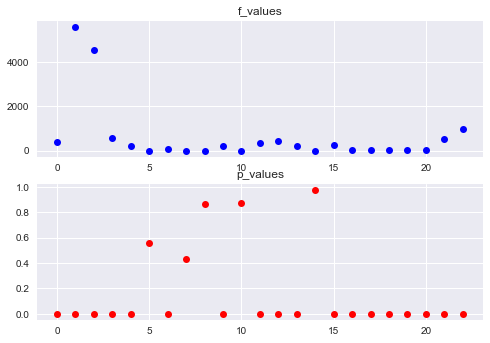

In [70]:
f_values, p_values = f_regression(X_train, y_train)
plt.figure(1)
plt.subplot(211)
plt.plot(f_values, 'bo')
plt.title('f_values')

plt.subplot(212)
plt.plot(p_values,'ro')
plt.title('p_values')
plt.show()

In [71]:
select = SelectKBest(k=16, score_func=f_regression)
select.fit(X_train, y_train)
#print(X_train.shape)
X_train_sub = select.transform(X_train)
#print(X_train_sub.shape)

In [99]:
# Train Score
rg_grid2 = GridSearchCV(rg_polypipe, rg_param1, cv = 10).fit(X_train_sub, y_train)
rg_grid2.score(X_train_sub,y_train) 

0.88721517427637164

RG3 = Ridge(alpha = rg_grid2.best_params_['ridge__alpha']).fit(X_train_sub, y_train)

# Test Score
poly = PolynomialFeatures()
X_test_sub = select.transform(X_test_scaled)
X_test_subpoly1 = poly.fit_transform(X_test_sub)
RG3.fit(X_test_subpoly1, y_test)
RG3.score(X_test_subpoly1,y_test) 

### Feature Selection based on coefficient using Ridge

In [81]:
RG1 = Ridge(alpha = rg_grid1.best_params_['ridge__alpha']).fit(X_train_scaled, y_train)

In [82]:
def select_coef(model,df): #select features with high absolute coefficient 
    dic = {}
    for i in range(0,len(list(df))):
        dic[list(df)[i]] = abs(model.coef_)[i]
    feature_lst = sorted(((value,key) for (key,value) in dic.items()),reverse = True)
    sel_feature =[]
    for j in range(0,18):
        sel_feature.append(feature_lst[j][1])
    return sel_feature

In [83]:
def drop_features(lst, df):
    '''
    lst: list of important selected features
    '''
    for i in df.columns:
        if i not in lst:
                del df[i]
    scaler = StandardScaler()
    scaler.fit(df)
    df_sub1 = scaler.transform(df)
    return df

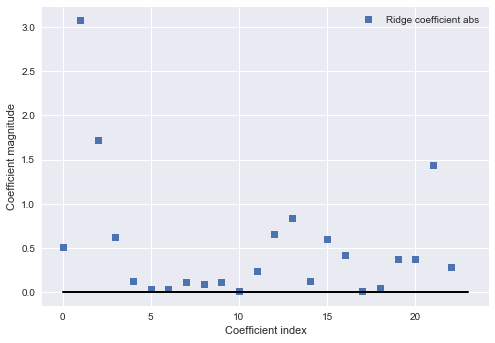

In [84]:
#cofficient plot
plt.plot(abs(RG1.coef_), 's',label="Ridge coefficient abs")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.plot([0,23],[0,0],'k-',lw=2)
plt.show()

In [100]:
#select important features based on coefficient
feature_lst = select_coef(RG1,X_train.copy()) 
X_train_sub1 = drop_features(feature_lst, X_train.copy())

#Ridge Model without polynomial features
scaler = StandardScaler()
scaler.fit(X_train_sub1)
X_train_sub1_scaled = scaler.transform(X_train_sub1)
RG4 = Ridge(alpha = rg_grid1.best_params_['ridge__alpha']).fit(X_train_sub1_scaled, y_train)
print("Ridge train score with feature selection: {:.6f}".format(RG4.score(X_train_sub1_scaled,y_train))) 

Ridge train score with feature selection: 0.778127


#test score without polynomial feature selection
X_test_sub1 = drop_features(feature_lst, X_test.copy())
scaler = StandardScaler()
scaler.fit(X_train_sub1)
X_test_sub1_scaled = scaler.transform(X_test_sub1)
RG4.fit(X_test_sub1_scaled, y_test) 
print("Ridge test score: {:.6f}".format(RG1.score(X_test_scaled, y_test))) 
print("Ridge test score with feature selection: {:.6f}".format(RG4.score(X_test_sub1_scaled,y_test))) 

#RG = Ridge(alpha = rg_polygrid.best_params_['ridge__alpha']).fit(X_train_scaled, y_train)
RG2 = Ridge(alpha = rg_polygrid.best_params_['ridge__alpha']).fit(X_train_scaled, y_train)
RG2.fit(X_test_poly,y_test)
print("Ridge test score with polynomial features: {:.6f}".format(RG2.score(X_test_poly,y_test)))
X_test_subpoly2 = poly.fit_transform(X_test_sub1_scaled)
RG1.fit(X_test_subpoly2,y_test)
RG1.score(X_test_subpoly2,y_test)
print("Ridge test score with polynomial features and feature selection: {:.6f}".format(RG1.score(X_test_subpoly2,y_test)))


### Using feature_selection.RFECV 

In [101]:
def false_rfe(lst, df):
    '''
    lst: list of rfe support
    '''
    #print(df.columns[])
    false_col = []
    for i in range(0,len(lst)):
        if lst[i] == False:
            #false_ind.append(i)
            false_col.append(df.columns[i])
    return false_col

In [102]:
def drop_col(lst,df):
    '''
    lst: list of false feature
    '''
    df = df.drop(lst,axis=1)
    scaler = StandardScaler()
    scaler.fit(df)
    df_sub2 = scaler.transform(df)
    return df_sub2

In [103]:
rfe = RFECV(LinearRegression(), cv=10) 
rfe.fit(X_train_scaled, y_train) 
support_lst = rfe.support_
false_col = false_rfe(support_lst,X_train.copy())
X_train_sub2 = drop_col(false_col, X_train.copy())
print(support_lst, "\n")
print("Drop the following 10 features:")
print(false_col)

[ True  True  True  True False False False False False False False  True
  True  True False  True  True False False  True  True  True  True] 

Drop the following 10 features:
['Lockup Torque Converter', 'Trans Creeper Gear', 'Max Ethanol % - Gasoline', '2Dr Pass Vol', '2Dr Lugg Vol', '4Dr Pass Vol', '4Dr Lugg Vol', 'Unique Label?', 'Var Valve Lift?', 'Camless Valvetrain (Y or N)']


In [104]:
RG5 = Ridge(alpha = rg_polygrid.best_params_['ridge__alpha']).fit(X_train_sub2, y_train)
poly = PolynomialFeatures()
X_train_subpoly2 = poly.fit_transform(X_train_sub2)
RG5.fit(X_train_subpoly2, y_train)
RG5.score(X_train_subpoly2,y_train)

0.88261362478825311

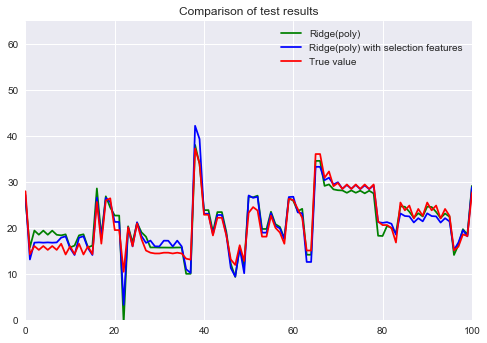

In [105]:
l1 = plt.plot(RG2.predict(X_train_poly),"g", label = "Ridge(poly)")
l2 = plt.plot(RG5.predict(X_train_subpoly2),"b", label = "Ridge(poly) with selection features")
l3 = plt.plot(y_train,'r', label = "True value")
plt.title('Comparison of test results')
plt.xlim(0, 100)
plt.ylim(0,65)
plt.legend()
plt.show()

# Summary

### The best model is Ridge model.

### Feature Engineering: Polynomial features

### Feature  Selection: features with high coefficients (absolute value) are the important features 

### Test Set is used when accessing model fitting scores

In [109]:
rg_polypipe = make_pipeline(StandardScaler(),PolynomialFeatures(include_bias = False), Ridge())
rg_param1= {'ridge__alpha': np.logspace(0, 3, 13)}
rg_polygrid = GridSearchCV(rg_polypipe, rg_param1, cv = 10).fit(X_train, y_train)
RG1 = Ridge(alpha = rg_grid1.best_params_['ridge__alpha']).fit(X_train_scaled, y_train)
X_test_sub1 = drop_features(feature_lst, X_test.copy())
scaler = StandardScaler()
scaler.fit(X_train_sub1)
X_test_sub1_scaled = scaler.transform(X_test_sub1)
X_test_subpoly2 = poly.fit_transform(X_test_sub1_scaled)
RG1.fit(X_test_subpoly2,y_test)
RG1.score(X_test_subpoly2,y_test)
print("Ridge test score with polynomial features and feature selection: {:.6f}".format(RG1.score(X_test_subpoly2,y_test)))

Ridge test score with polynomial features and feature selection: 0.912633
